# Lab 01 - Feature Engineering

## Handling missing values and reducing dimensionality

### Importing the libraries and reading the files

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('train.csv')
valid_data = pd.read_csv('valid.csv')
test_data = pd.read_csv('X_test.csv')

### Finding out the proportion of categories in the target column

This is done again after handling missing values to make sure that the proprortions were not changed while dropping rows that had a significant amount of null values.

In [3]:
# Finding the percantage of 1 in the target variable
print(train_data['loan_status'].value_counts(normalize=True))
print(valid_data['loan_status'].value_counts(normalize=True))

loan_status
1    0.696801
0    0.303199
Name: proportion, dtype: float64
loan_status
1    0.696801
0    0.303199
Name: proportion, dtype: float64


### Getting an idea of the size of the data sets

In [4]:
print(train_data.shape, valid_data.shape, test_data.shape)

(517788, 145) (172596, 145) (172596, 144)


### Dropping duplicate rows

In [ ]:
train_data.drop_duplicates(inplace=True)
valid_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

### Dropping columns with more than 50% missing values

In [5]:
missing_values_train = train_data.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
missing_values_train = missing_values_train[missing_values_train > 0.5*len(train_data)]

train_data = train_data.drop(missing_values_train.index, axis=1)

In [6]:
missing_values_valid = valid_data.isnull().sum()
missing_values_valid = missing_values_valid[missing_values_valid > 0]
missing_values_valid = missing_values_valid[missing_values_valid > 0.5*len(valid_data)]

valid_data = valid_data.drop(missing_values_valid.index, axis=1)


In [7]:
missing_values_test = test_data.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
missing_values_test = missing_values_test[missing_values_test > 0.5*len(valid_data)]

test_data = test_data.drop(missing_values_test.index, axis=1)

We can check which columns were dropped in each data set.

In [10]:
print(missing_values_train)

id                                            172596
member_id                                     172596
url                                           172596
desc                                          156832
mths_since_last_delinq                         86453
mths_since_last_record                        142777
next_pymnt_d                                  172596
mths_since_last_major_derog                   126427
annual_inc_joint                              169438
dti_joint                                     169438
verification_status_joint                     169455
open_acc_6m                                   105278
open_act_il                                   105278
open_il_12m                                   105278
open_il_24m                                   105278
mths_since_rcnt_il                            107016
total_bal_il                                  105278
il_util                                       114111
open_rv_12m                                   

In [9]:
print(missing_values_valid)

id                                            517788
member_id                                     517788
url                                           517788
desc                                          470160
mths_since_last_delinq                        260696
mths_since_last_record                        427989
next_pymnt_d                                  517788
mths_since_last_major_derog                   380663
annual_inc_joint                              508323
dti_joint                                     508324
verification_status_joint                     508381
open_acc_6m                                   315846
open_act_il                                   315846
open_il_12m                                   315846
open_il_24m                                   315846
mths_since_rcnt_il                            321223
total_bal_il                                  315846
il_util                                       342514
open_rv_12m                                   

In [11]:
print(missing_values_test)

id                                            172596
member_id                                     172596
url                                           172596
desc                                          156835
mths_since_last_delinq                         86640
mths_since_last_record                        142750
next_pymnt_d                                  172596
mths_since_last_major_derog                   126710
annual_inc_joint                              169320
dti_joint                                     169320
verification_status_joint                     169336
open_acc_6m                                   105458
open_act_il                                   105458
open_il_12m                                   105458
open_il_24m                                   105458
mths_since_rcnt_il                            107267
total_bal_il                                  105458
il_util                                       114321
open_rv_12m                                   

### Dropping columns with only one unique value

In [12]:
unique_value_train = []
for column in train_data.columns:
    if train_data[column].nunique() == 1:
        unique_value_train.append(column)
        
train_data = train_data.drop(unique_value_train, axis=1)

In [13]:
unique_value_valid = []
for column in valid_data.columns:
    if valid_data[column].nunique() == 1:
        unique_value_valid.append(column)

valid_data = valid_data.drop(unique_value_valid, axis=1)

In [14]:
unique_value_test = []
for column in test_data.columns:
    if test_data[column].nunique() == 1:
        unique_value_test.append(column)

test_data = test_data.drop(unique_value_test, axis=1)

In [15]:
print(unique_value_train)
print(unique_value_valid)
print(unique_value_test)

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']
['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code']
['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']


In [17]:
valid_data['hardship_flag'].value_counts()

hardship_flag
N    172595
Y         1
Name: count, dtype: int64

In [18]:
valid_data = valid_data.drop('hardship_flag', axis=1)

### Dropping other columns 

I drop the following columns because they does not seem to be important.
- zip_code
- addr_state
- title

<br>

I also drop the 'emp_title' column because there are too many unique values in it, making it hard to encode. <br> 
I also drop the column 'grade' because we can use the column 'sub_grade' to get better predictions.

In [20]:
train_data.drop(['zip_code','emp_title','addr_state','title','grade'], axis=1, inplace=True)
valid_data.drop(['zip_code','emp_title','addr_state','title','grade'], axis=1, inplace=True)
test_data.drop(['zip_code','emp_title','addr_state','title','grade'], axis=1, inplace=True)

In [21]:
print(train_data.shape, valid_data.shape, test_data.shape)

(517788, 77) (172596, 77) (172596, 76)


 ### Finding the columns which have more than 0 and less than 10000 missing values and dropping corresponding columns (in training and validation data sets) 

In [26]:
missing_values_train = train_data.isnull().sum()
missing_values_train = missing_values_train[missing_values_train < 10000]
missing_values_train = missing_values_train[missing_values_train > 0]

In [27]:
missing_values_valid = valid_data.isnull().sum()
missing_values_valid = missing_values_valid[missing_values_valid < 10000]
missing_values_valid = missing_values_valid[missing_values_valid > 0]

In [28]:
train_data.dropna(subset=missing_values_train.index, inplace=True)
valid_data.dropna(subset=missing_values_valid.index, inplace=True)

### Dropping rows further

First I had to get an idea about the current size of the data set.

In [29]:
print(train_data.shape, valid_data.shape, test_data.shape)

(515713, 77) (161464, 77) (172596, 76)


Then I had to find columns which still have null values along with the number of null values in each column.

In [30]:
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

emp_length                    31017
tot_coll_amt                  25530
tot_cur_bal                   25530
total_rev_hi_lim              25530
acc_open_past_24mths          17644
avg_cur_bal                   25530
bc_open_to_buy                22671
bc_util                       22915
mo_sin_old_il_acct            40207
mo_sin_old_rev_tl_op          25530
mo_sin_rcnt_rev_tl_op         25530
mo_sin_rcnt_tl                25530
mort_acc                      17644
mths_since_recent_bc          22360
mths_since_recent_inq         64319
num_accts_ever_120_pd         25530
num_actv_bc_tl                25530
num_actv_rev_tl               25530
num_bc_sats                   20963
num_bc_tl                     25530
num_il_tl                     25530
num_op_rev_tl                 25530
num_rev_accts                 25530
num_rev_tl_bal_gt_0           25530
num_sats                      20963
num_tl_120dpd_2m              45284
num_tl_30dpd                  25530
num_tl_90g_dpd_24m          

In [31]:
missing_values = valid_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

emp_length               10060
mo_sin_old_il_acct        4770
mths_since_recent_inq    15055
num_tl_120dpd_2m          6611
dtype: int64

In [32]:
missing_values = test_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

emp_length                    10449
dti                              44
revol_util                       90
last_pymnt_d                    436
last_credit_pull_d                6
collections_12_mths_ex_med        4
tot_coll_amt                   8667
tot_cur_bal                    8667
total_rev_hi_lim               8667
acc_open_past_24mths           5989
avg_cur_bal                    8670
bc_open_to_buy                 7746
bc_util                        7851
chargeoff_within_12_mths          4
mo_sin_old_il_acct            13529
mo_sin_old_rev_tl_op           8667
mo_sin_rcnt_rev_tl_op          8667
mo_sin_rcnt_tl                 8667
mort_acc                       5989
mths_since_recent_bc           7605
mths_since_recent_inq         21689
num_accts_ever_120_pd          8667
num_actv_bc_tl                 8667
num_actv_rev_tl                8667
num_bc_sats                    7175
num_bc_tl                      8667
num_il_tl                      8667
num_op_rev_tl               

Assuming that employment length is an important factor when predicting loan status, rows where ‘emp_length’ is null were dropped.

In [33]:
train_data.dropna(subset=['emp_length'], inplace=True)
valid_data.dropna(subset=['emp_length'], inplace=True)

There were many columns with the same number of null values. Assuming these columns are connected, rows where ‘tot_coll_amt’ was null were dropped.

In [34]:
train_data.dropna(subset=['tot_coll_amt'], inplace=True)
valid_data.dropna(subset=['tot_coll_amt'], inplace=True)

Columns which still have null values are checked.

In [41]:
missing_values = valid_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

mo_sin_old_il_acct        4075
mths_since_recent_inq    13991
num_tl_120dpd_2m          6151
dtype: int64

In [42]:
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

bc_open_to_buy            4494
bc_util                   4718
mo_sin_old_il_acct       12513
mths_since_recent_bc      4222
mths_since_recent_inq    42277
num_tl_120dpd_2m         18339
pct_tl_nvr_dlq              63
percent_bc_gt_75          4632
dtype: int64

In [40]:
print(train_data.shape, valid_data.shape, test_data.shape)

(459988, 77) (151404, 77) (172596, 76)


## Imputing values

### Visualizing distributions

Before imputing Values, it is important to visualize the distributions of the features which have null values.

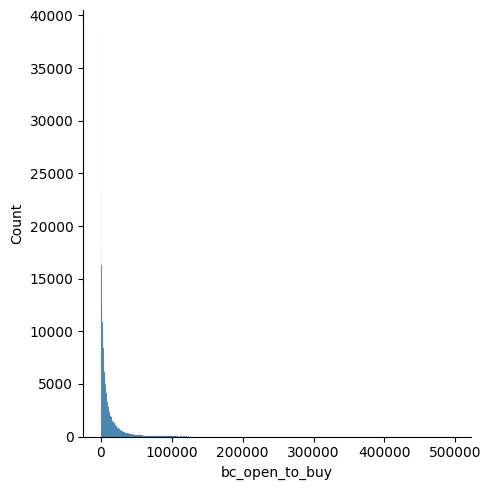

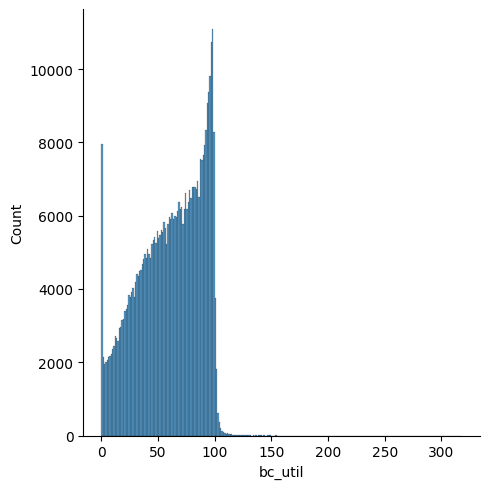

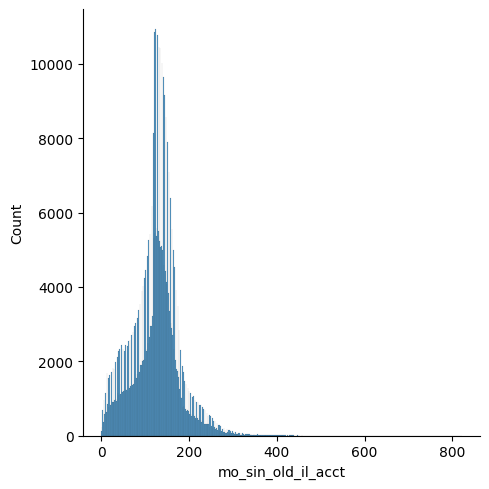

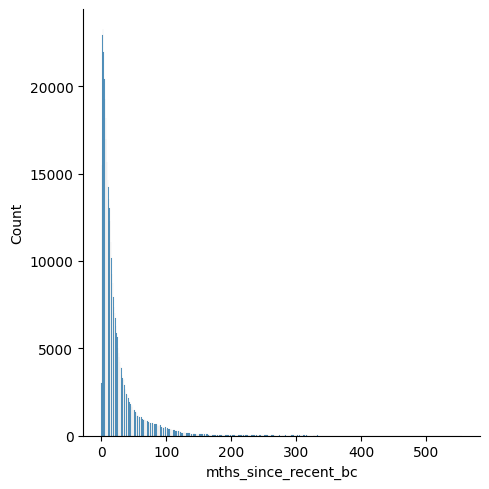

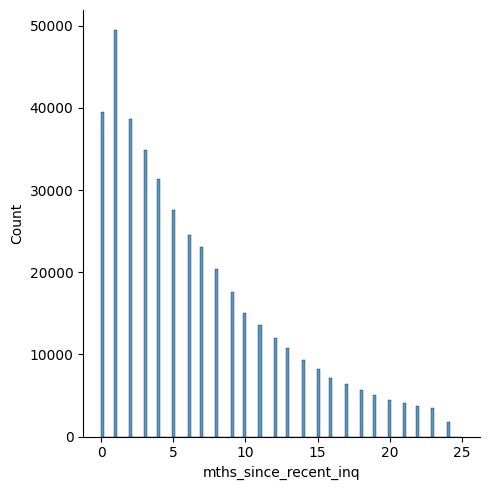

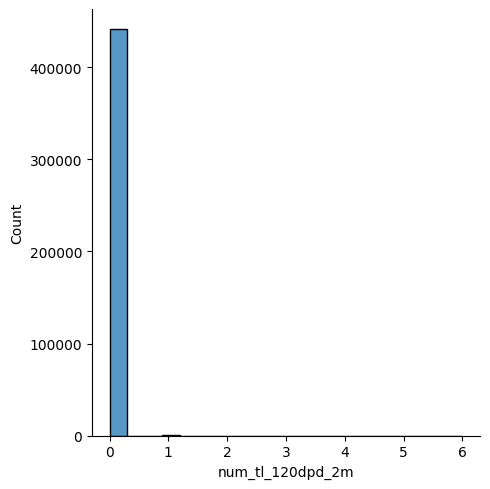

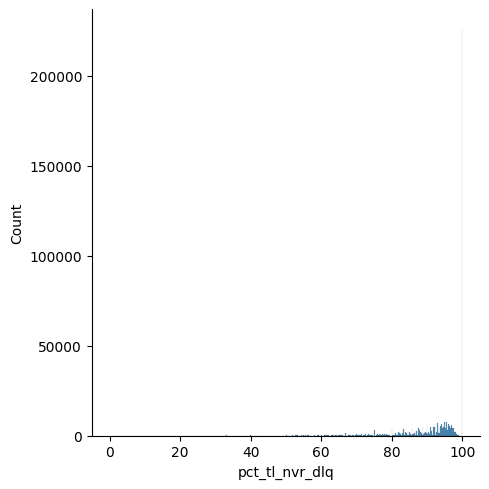

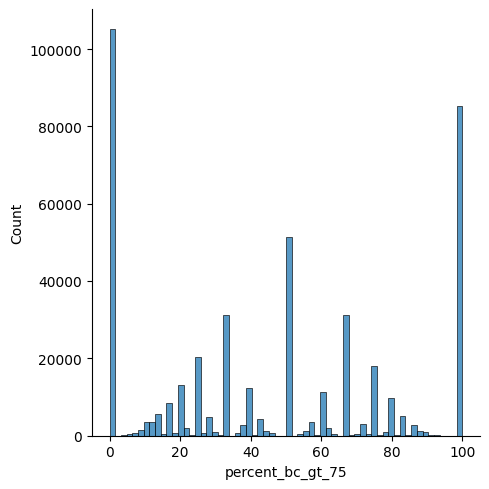

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in missing_values.index:
    sns.displot(train_data[column].dropna())
    plt.show()

### Imputing values

The following features were imputed with the mean of those features in the training data set.
- percent_bc_gt_75
- pct_tl_nvr_dlq

<br>

The following features were imputed with the mode of those features in the training data set.
- num_tl_120_dpd_2m
- mths_since_recent_inq
- bc_open_to_buy
- mths_since_recent_bc
- bc_util

<br>

The following feature was imputed with the median of that feature in the training data set.
- mo_sin_old_il_acct

In [45]:
mean_impute = ['percent_bc_gt_75', 'pct_tl_nvr_dlq']
mode_impute = ['num_tl_120dpd_2m','mths_since_recent_inq', 'mths_since_recent_bc', 'bc_open_to_buy', 'bc_util']
median_impute = ['mo_sin_old_il_acct']

for col in median_impute:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    valid_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(train_data[col].median(), inplace=True)
    
for col in mode_impute:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)   
    valid_data[col].fillna(train_data[col].mode()[0], inplace=True) 
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)   
    
for col in mean_impute:
    train_data[col].fillna(train_data[col].mean(), inplace=True)
    valid_data[col].fillna(train_data[col].mean(), inplace=True)
    test_data[col].fillna(train_data[col].mean(), inplace=True)        

C:\Users\gayka\AppData\Local\Temp\ipykernel_6304\377652448.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
C:\Users\gayka\AppData\Local\Temp\ipykernel_6304\377652448.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

We have to find out which columns still have missing values.

In [46]:
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

In [47]:
missing_values = valid_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

In [48]:
missing_values = test_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

emp_length                    10449
dti                              44
revol_util                       90
last_pymnt_d                    436
last_credit_pull_d                6
collections_12_mths_ex_med        4
tot_coll_amt                   8667
tot_cur_bal                    8667
total_rev_hi_lim               8667
acc_open_past_24mths           5989
avg_cur_bal                    8670
bc_open_to_buy                 7746
bc_util                        7851
chargeoff_within_12_mths          4
mo_sin_old_rev_tl_op           8667
mo_sin_rcnt_rev_tl_op          8667
mo_sin_rcnt_tl                 8667
mort_acc                       5989
mths_since_recent_bc           7605
mths_since_recent_inq         21689
num_accts_ever_120_pd          8667
num_actv_bc_tl                 8667
num_actv_rev_tl                8667
num_bc_sats                    7175
num_bc_tl                      8667
num_il_tl                      8667
num_op_rev_tl                  8667
num_rev_accts               

### Imputing the remaining null values of the test data set

Only the above columns of the test data set have null values. This happened because we did not remove rows in the test data set. The values in those columns should be imputed accordingly.

In [50]:
# Finding non numeric data in test data and imputing them with mode
non_numeric = test_data.select_dtypes(include=['object']).columns

for col in non_numeric:
    test_data[col].fillna(train_data[col].mode()[0], inplace=True)
    
# Finding numeric skewed data and imputing them with median
numeric = test_data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric:
    if test_data[col].skew() > 1 or test_data[col].skew() < -1:
        test_data[col].fillna(train_data[col].median(), inplace=True)
    else:
        test_data[col].fillna(train_data[col].mean(), inplace=True)

C:\Users\gayka\AppData\Local\Temp\ipykernel_6304\1509456323.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(train_data[col].mode()[0], inplace=True)
C:\Users\gayka\AppData\Local\Temp\ipykernel_6304\1509456323.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

We should check whether there are rows which still have null values in the test data set.

In [51]:
missing_values = test_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

The size of the data sets should be checked again to ensure that a significant number of rows were not dropped.

In [52]:
print(train_data.shape, valid_data.shape, test_data.shape)

(459988, 77) (151404, 77) (172596, 76)


### Finding out the proportion of categories in the target column again

In [53]:
print(train_data['loan_status'].value_counts(normalize=True))
print(valid_data['loan_status'].value_counts(normalize=True))

loan_status
1    0.700736
0    0.299264
Name: proportion, dtype: float64
loan_status
1    0.700959
0    0.299041
Name: proportion, dtype: float64


## Removing Correlated Features

### Separating non numeric columns and numeric columns

In [54]:
non_numeric = train_data.select_dtypes(include=['object']).columns
numeric = train_data.select_dtypes(include=['int64', 'float64']).columns

### Drawing the correlation matrix between the numeric features

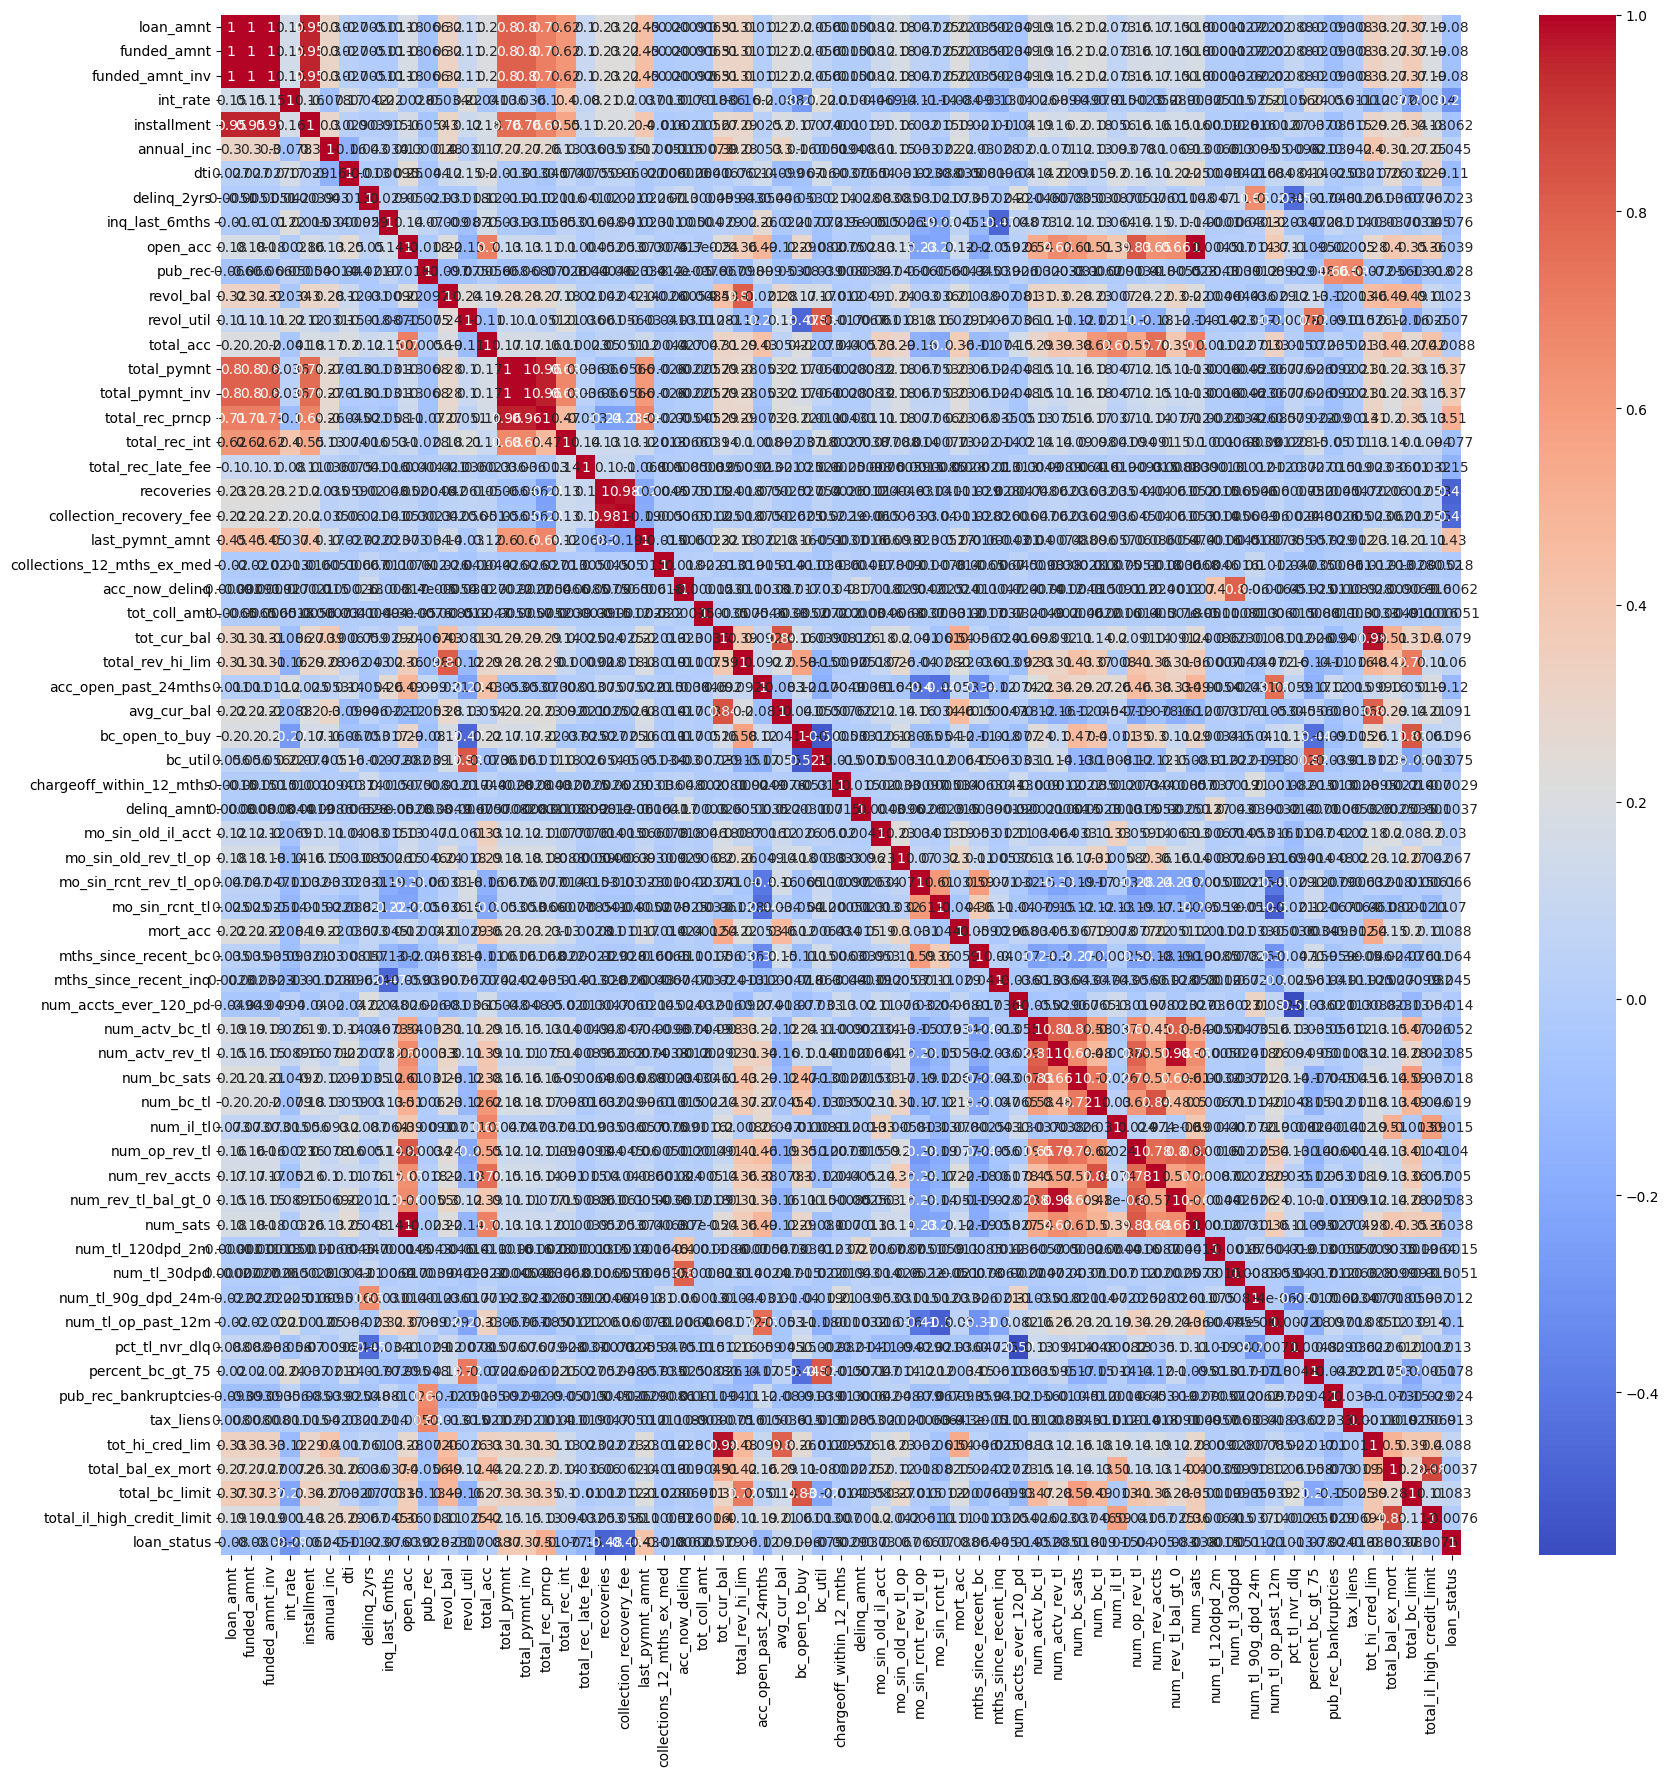

In [55]:
correlation_matrix = train_data[numeric].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Dropping correlated columns

'loan_amn',  'funded_amnt'  and  'funded_amnt_inv'  are highly correlated. <br>
So we can drop  'funded_amnt'  and  'funded_amnt_inv'.

In [57]:
train_data.drop(['funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)
valid_data.drop(['funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)
test_data.drop(['funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)

# We should drop funded_amnt and funded_amnt_inv from the list of numeric features.
numeric = [feature for feature in numeric if feature not in ['funded_amnt', 'funded_amnt_inv']]

'total_pymnt',  'total_pymnt_inv'  and  'total_rec_prncp' are highly correlated. <br>
So we can drop  'total_pymnt_inv'  and  'total_rec_prncp'.

In [56]:
train_data.drop(['total_pymnt_inv', 'total_rec_prncp'], axis=1, inplace=True)
valid_data.drop(['total_pymnt_inv', 'total_rec_prncp'], axis=1, inplace=True)
test_data.drop(['total_pymnt_inv', 'total_rec_prncp'], axis=1, inplace=True)

# We should drop total_pymnt_inv and total_rec_prncp from the list of numeric features.
numeric = [feature for feature in numeric if feature not in ['total_pymnt_inv', 'total_rec_prncp']]

'recoveries'  and  'collection_recovery_fee'  are highly correlated. <br>So we can drop 'collection_recovery_fee'.

In [58]:
train_data.drop(['collection_recovery_fee'], axis=1, inplace=True)
valid_data.drop(['collection_recovery_fee'], axis=1, inplace=True)
test_data.drop(['collection_recovery_fee'], axis=1, inplace=True)

# We should drop collection_recovery_fee from the list of numeric features.
numeric = [feature for feature in numeric if feature not in ['collection_recovery_fee']]

'num_sats'  and  'open_acc'  are highly correlated. <br>So we can drop  'open_acc'.

In [59]:
train_data.drop(['open_acc'], axis=1, inplace=True)
valid_data.drop(['open_acc'], axis=1, inplace=True)
test_data.drop(['open_acc'], axis=1, inplace=True)

# We should drop open_acc from the list of numeric features.
numeric = [feature for feature in numeric if feature not in ['open_acc']]

'loan_amnt' and 'installment' are highly correlated. <br>
So we can drop 'installment'.

In [60]:
train_data.drop(['installment'], axis=1, inplace=True)
valid_data.drop(['installment'], axis=1, inplace=True)
test_data.drop(['installment'], axis=1, inplace=True)

# We should drop installment from the list of numeric features.
numeric = [feature for feature in numeric if feature not in ['installment']]

'tot_cur_bal' and 'tot_hi_cred_lim' are highly correlated. <br>
So we can drop 'tot_hi_cred_lim'.

In [61]:
train_data.drop(['tot_hi_cred_lim'], axis=1, inplace=True)
valid_data.drop(['tot_hi_cred_lim'], axis=1, inplace=True)
test_data.drop(['tot_hi_cred_lim'], axis=1, inplace=True)

# We should drop tot_hi_cred_lim from the list of numeric features.
numeric = [feature for feature in numeric if feature not in ['tot_hi_cred_lim']]

'num_actv_rev_tl' and 'num_rev_tl_bal_gt_0' are highly correlated. <br>
So we can drop 'num_rev_tl_bal_gt_0'.

In [62]:
train_data.drop(['num_rev_tl_bal_gt_0'], axis=1, inplace=True)
valid_data.drop(['num_rev_tl_bal_gt_0'], axis=1, inplace=True)
test_data.drop(['num_rev_tl_bal_gt_0'], axis=1, inplace=True)

# We should drop num_rev_tl_bal_gt_0 from the list of numeric features.
numeric = [feature for feature in numeric if feature not in ['num_rev_tl_bal_gt_0']]

### Drawing the correlation matrix again

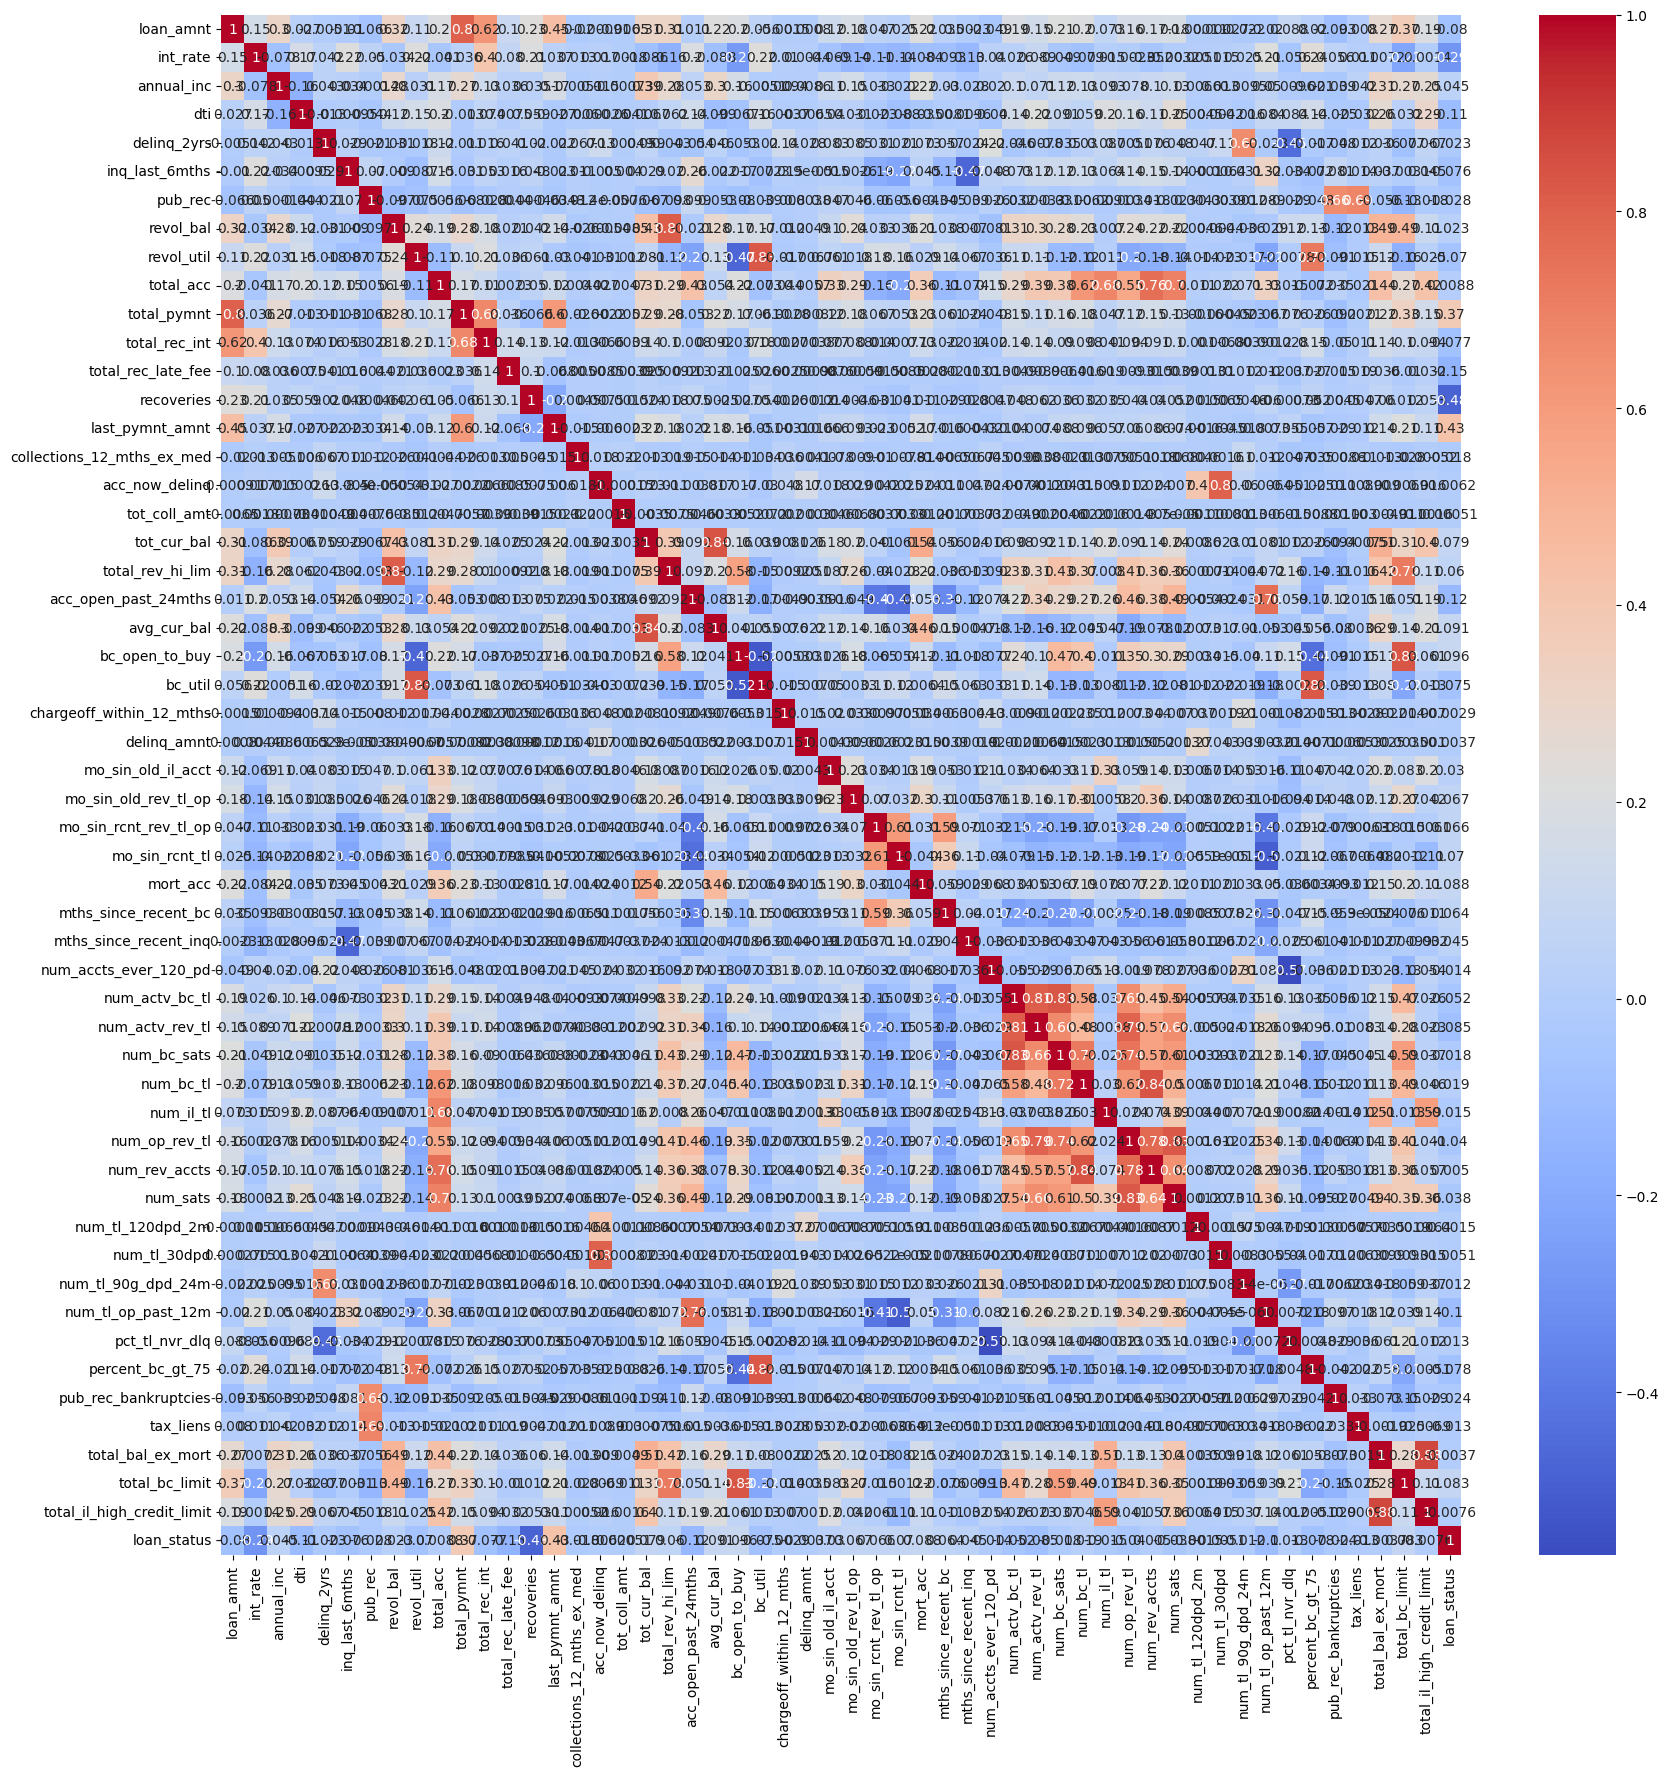

In [63]:
correlation_matrix = train_data[numeric].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [64]:
print(train_data.shape, valid_data.shape, test_data.shape)

(459988, 68) (151404, 68) (172596, 67)


## Encoding Values

We start by finding the features with non-numeric data.

In [65]:
non_numeric = train_data.select_dtypes(include=['object'])
non_numeric

term sub_grade emp_length home_ownership verification_status  \
0        36 months        A4     1 year       MORTGAGE        Not Verified   
2        36 months        A4    4 years       MORTGAGE        Not Verified   
4        36 months        A4   < 1 year       MORTGAGE     Source Verified   
5        36 months        C4    5 years       MORTGAGE            Verified   
6        36 months        C1   < 1 year       MORTGAGE            Verified   
...            ...       ...        ...            ...                 ...   
517783   36 months        D5    3 years           RENT            Verified   
517784   36 months        C3    4 years       MORTGAGE     Source Verified   
517785   60 months        D3  10+ years       MORTGAGE     Source Verified   
517786   36 months        C5  10+ years       MORTGAGE            Verified   
517787   36 months        A3  10+ years       MORTGAGE     Source Verified   

       issue_d             purpose earliest_cr_line initial_list_status  \
0       Aug-17  debt_consolidation           Feb-03                   f   
2       Mar-16         credit_card           Jul-97                   f   
4       Mar-16         credit_card           Jan-01                   w   
5       Mar-16    home_improvement           Mar-99                   w   
6       May-16    home_improvement           Sep-00                   f   
...        ...                 ...              ...                 ...   
517783  Jul-13             medical           Nov-95                   f   
517784  May-17  debt_consolidation           Apr-08                   f   
517785  Feb-14  debt_consolidation           Nov-90                   f   
517786  Feb-13  debt_consolidation           Dec-94                   f   
517787  Oct-14  debt_consolidation           Mar-97                   w   

       last_pymnt_d last_credit_pull_d application_type disbursement_method  \
0            Dec-18             Dec-18       Individual                Cash   
2            Oct-17             Oct-17       Individual                Cash   
4            Dec-17             Jul-18       Individual                Cash   
5            May-16             Feb-19       Individual                Cash   
6            Dec-18             Dec-18       Individual                Cash   
...             ...                ...              ...                 ...   
517783       Apr-14             Oct-16       Individual                Cash   
517784       Feb-19             Feb-19       Individual                Cash   
517785       Aug-14             Oct-16       Individual                Cash   
517786       Feb-16             Jul-18       Individual                Cash   
517787       Aug-17             Feb-19       Individual                Cash   

       debt_settlement_flag  
0                         N  
2                         N  
4                         N  
5                         Y  
6                         N  
...                     ...  
517783                    N  
517784                    N  
517785                    N  
517786                    N  
517787                    N  

[459988 rows x 14 columns]

### 'term'
To do that, we must first find out what are the unique values in the feature.

In [68]:
train_data['term'].value_counts()
valid_data['term'].value_counts()
test_data['term'].value_counts()

term
0    127490
1     45106
Name: count, dtype: int64

We can using label encoding.

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_data['term'] = label_encoder.fit_transform(train_data['term'])
valid_data['term'] = label_encoder.fit_transform(valid_data['term'])
test_data['term'] = label_encoder.fit_transform(test_data['term'])

### 'sub_grade'
We can encode sub_grade using ordinal encoding

In [69]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

train_data['sub_grade'] = ordinal_encoder.fit_transform(train_data[['sub_grade']])
valid_data['sub_grade'] = ordinal_encoder.fit_transform(valid_data[['sub_grade']])
test_data['sub_grade'] = ordinal_encoder.fit_transform(test_data[['sub_grade']])

### 'emp_length'

In [70]:
train_data['emp_length'].value_counts()

emp_length
10+ years    162350
2 years       44233
< 1 year      38902
3 years       38881
1 year        31785
5 years       29992
4 years       28871
6 years       22410
8 years       22279
7 years       21506
9 years       18779
Name: count, dtype: int64

In [71]:
train_data['emp_length'] = train_data['emp_length'].map({'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1, '5 years': 5, '4 years': 4, '8 years': 8, '7 years': 7, '6 years': 6, '9 years': 9})
valid_data['emp_length'] = valid_data['emp_length'].map({'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1, '5 years': 5, '4 years': 4, '8 years': 8, '7 years': 7, '6 years': 6, '9 years': 9})
test_data['emp_length'] = test_data['emp_length'].map({'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1, '5 years': 5, '4 years': 4, '8 years': 8, '7 years': 7, '6 years': 6, '9 years': 9})

### 'house ownership' and 'verification_status' 

In [73]:
train_data['home_ownership'].value_counts()

home_ownership
MORTGAGE    226486
RENT        186211
OWN          47164
ANY             96
OTHER           17
NONE            14
Name: count, dtype: int64

In [74]:
train_data['verification_status'].value_counts()

verification_status
Source Verified    188095
Verified           137698
Not Verified       134195
Name: count, dtype: int64

In [75]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

train_data = pd.get_dummies(train_data, columns=['home_ownership'])
valid_data = pd.get_dummies(valid_data, columns=['home_ownership'])
test_data = pd.get_dummies(test_data, columns=['home_ownership'])

train_data = pd.get_dummies(train_data, columns=['verification_status'])
valid_data = pd.get_dummies(valid_data, columns=['verification_status'])
test_data = pd.get_dummies(test_data, columns=['verification_status'])  

### 'issue_d', 'earliest_cr_line', 'last_pymnt_d' and 'last_credit_pull_d'

We can count the number of months to February 2024.

In [77]:
train_data['issue_d'] = pd.to_datetime(train_data['issue_d'], format='%b-%y')
train_data['earliest_cr_line'] = pd.to_datetime(train_data['earliest_cr_line'], format='%b-%y')
train_data['last_pymnt_d'] = pd.to_datetime(train_data['last_pymnt_d'], format='%b-%y')
train_data['last_credit_pull_d'] = pd.to_datetime(train_data['last_credit_pull_d'], format='%b-%y')

train_data['issue_d'] = (2024*12 + 2) - (train_data['issue_d'].dt.year*12 + train_data['issue_d'].dt.month)
train_data['earliest_cr_line'] = (2024*12 + 2) - (train_data['earliest_cr_line'].dt.year*12 + train_data['earliest_cr_line'].dt.month)
train_data['last_pymnt_d'] = (2024*12 + 2) - (train_data['last_pymnt_d'].dt.year*12 + train_data['last_pymnt_d'].dt.month)
train_data['last_credit_pull_d'] = (2024*12 + 2) - (train_data['last_credit_pull_d'].dt.year*12 + train_data['last_credit_pull_d'].dt.month)

In [78]:
valid_data['issue_d'] = pd.to_datetime(valid_data['issue_d'], format='%b-%Y')
valid_data['earliest_cr_line'] = pd.to_datetime(valid_data['earliest_cr_line'], format='%b-%Y')
valid_data['last_pymnt_d'] = pd.to_datetime(valid_data['last_pymnt_d'], format='%b-%Y')
valid_data['last_credit_pull_d'] = pd.to_datetime(valid_data['last_credit_pull_d'], format='%b-%Y')

valid_data['issue_d'] = (2024*12 + 2) - (valid_data['issue_d'].dt.year*12 + valid_data['issue_d'].dt.month)
valid_data['earliest_cr_line'] = (2024*12 + 2) - (valid_data['earliest_cr_line'].dt.year*12 + valid_data['earliest_cr_line'].dt.month)
valid_data['last_pymnt_d'] = (2024*12 + 2) - (valid_data['last_pymnt_d'].dt.year*12 + valid_data['last_pymnt_d'].dt.month)
valid_data['last_credit_pull_d'] = (2024*12 + 2) - (valid_data['last_credit_pull_d'].dt.year*12 + valid_data['last_credit_pull_d'].dt.month)


In the test data set, we replaced the null vlaues with the mode of training data set. <br> 
Therefore, the date formats are different. We have to handle it.

In [79]:
test_data['issue_d'] = pd.to_datetime(test_data['issue_d'], format='%b-%Y')
test_data['issue_d'] = (2024*12 + 2) - (test_data['issue_d'].dt.year*12 + test_data['issue_d'].dt.month)

test_data['earliest_cr_line'] = pd.to_datetime(test_data['earliest_cr_line'], format='%b-%Y')
test_data['earliest_cr_line'] = (2024*12 + 2) - (test_data['earliest_cr_line'].dt.year*12 + test_data['earliest_cr_line'].dt.month)

# In the column last_pymnt_d there are some values in as "Aug-18".
# We have to convert them to "Aug-2018"

test_data['last_pymnt_d'] = test_data['last_pymnt_d'].str.replace('18', '2018')
test_data['last_pymnt_d'] = test_data['last_pymnt_d'].str.replace('202018', '2018')

test_data['last_pymnt_d'] = pd.to_datetime(test_data['last_pymnt_d'], format='%b-%Y')
test_data['last_pymnt_d'] = (2024*12 + 2) - (test_data['last_pymnt_d'].dt.year*12 + test_data['last_pymnt_d'].dt.month)

# In the column last_credit_pull_d there are some values in as "Aug-19".
# We have to convert them to "Aug-2019"
test_data['last_credit_pull_d'] = test_data['last_credit_pull_d'].str.replace('19', '2019')
test_data['last_credit_pull_d'] = test_data['last_credit_pull_d'].str.replace('202019', '2019')

test_data['last_credit_pull_d'] = pd.to_datetime(test_data['last_credit_pull_d'], format='%b-%Y')
test_data['last_credit_pull_d'] = (2024*12 + 2) - (test_data['last_credit_pull_d'].dt.year*12 + test_data['last_credit_pull_d'].dt.month)

### 'purpose'

In [80]:
train_data['purpose'].value_counts()

purpose
debt_consolidation    272515
credit_card           100058
home_improvement       28930
other                  25499
major_purchase          9483
medical                 5098
small_business          5091
car                     4250
moving                  3194
vacation                2876
house                   2370
wedding                  320
renewable_energy         304
Name: count, dtype: int64

We use one hot encoding for the feature 'purpose'. <br>
Before that, we should change the values other than 'debt_consolidation', 'home_improvement' and 'credit_card' to 'other'.

In [81]:
train_data['purpose'] = train_data['purpose'].map({'debt_consolidation': 'debt_consolidation', 'home_improvement': 'home_improvement', 'credit_card': 'credit_card'})
train_data['purpose'].fillna('other', inplace=True)

valid_data['purpose'] = valid_data['purpose'].map({'debt_consolidation': 'debt_consolidation', 'home_improvement': 'home_improvement', 'credit_card': 'credit_card'})
valid_data['purpose'].fillna('other', inplace=True)

test_data['purpose'] = test_data['purpose'].map({'debt_consolidation': 'debt_consolidation', 'home_improvement': 'home_improvement', 'credit_card': 'credit_card'})
test_data['purpose'].fillna('other', inplace=True)

C:\Users\gayka\AppData\Local\Temp\ipykernel_6304\3665152699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['purpose'].fillna('other', inplace=True)
C:\Users\gayka\AppData\Local\Temp\ipykernel_6304\3665152699.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [82]:
train_data = pd.get_dummies(train_data, columns=['purpose'])
valid_data = pd.get_dummies(valid_data, columns=['purpose'])
test_data = pd.get_dummies(test_data, columns=['purpose'])

### 'initial_list_status' 

In [84]:
train_data['initial_list_status'].value_counts()

initial_list_status
w    279376
f    180612
Name: count, dtype: int64

In [85]:
train_data['initial_list_status'] = train_data['initial_list_status'].map({'w': 1, 'f': 0})
valid_data['initial_list_status'] = valid_data['initial_list_status'].map({'w': 1, 'f': 0})
test_data['initial_list_status'] = test_data['initial_list_status'].map({'w': 1, 'f': 0})

### 'application_type'

In [86]:
train_data['application_type'].value_counts()

application_type
Individual    452008
Joint App       7980
Name: count, dtype: int64

In [87]:
train_data['application_type'] = train_data['application_type'].map({'Individual': 1, 'Joint App': 0})
valid_data['application_type'] = valid_data['application_type'].map({'Individual': 1, 'Joint App': 0})
test_data['application_type'] = test_data['application_type'].map({'Individual': 1, 'Joint App': 0})

### 'disbursement_method'

In [91]:
train_data['disbursement_method'].value_counts()

disbursement_method
Cash         457917
DirectPay      2071
Name: count, dtype: int64

In [92]:
train_data['disbursement_method'] = train_data['disbursement_method'].map({'Cash': 1, 'DirectPay': 0})
valid_data['disbursement_method'] = valid_data['disbursement_method'].map({'Cash': 1, 'DirectPay': 0})
test_data['disbursement_method'] = test_data['disbursement_method'].map({'Cash': 1, 'DirectPay': 0})

### 'debt_settlement_flag'

In [88]:
train_data['debt_settlement_flag'].value_counts()

debt_settlement_flag
N    442528
Y     17460
Name: count, dtype: int64

In [89]:
train_data['debt_settlement_flag'] = train_data['debt_settlement_flag'].map({'N': 0, 'Y': 1})
valid_data['debt_settlement_flag'] = valid_data['debt_settlement_flag'].map({'N': 0, 'Y': 1})
test_data['debt_settlement_flag'] = test_data['debt_settlement_flag'].map({'N': 0, 'Y': 1})

### Getting the names of the remaining categorical variables

In [93]:
non_numeric = test_data.select_dtypes(include=['object'])
non_numeric

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[172596 rows x 0 columns]

### Getting the size of the data sets

In [94]:
print(train_data.shape, valid_data.shape, test_data.shape)

(459988, 78) (151404, 78) (172596, 77)


## Feature scaling

Normalizing features is not necessary for the XGBoost classifier.
[Resource can be seen here.](https://stats.stackexchange.com/questions/485677/does-xgboost-require-standarized-data) <br>
Therefore, I did not consider feature scaling.

## Applying mutual information

### Separating target column from training and validation data sets

In [95]:
X_train = train_data.drop('loan_status', axis=1)
Y_train = train_data['loan_status']

X_valid = valid_data.drop('loan_status', axis=1)
Y_valid = valid_data['loan_status']

### Applying mutual information

We can select the 20 best features using the mutual information method. 

In [96]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_classif, k=20)
selector.fit(X_train, Y_train)

# Getting the names of the most important features
selected_features = X_train.columns[selector.get_support()]

# Dropping the columns which are not in the selected features
X_train = X_train[selected_features]
X_valid = X_valid[X_train.columns]
test_data = test_data[X_train.columns]

print(selected_features)

Index(['term', 'int_rate', 'sub_grade', 'initial_list_status', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag',
       'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_debt_consolidation'],
      dtype='object')


### Drawing the correlation matrix

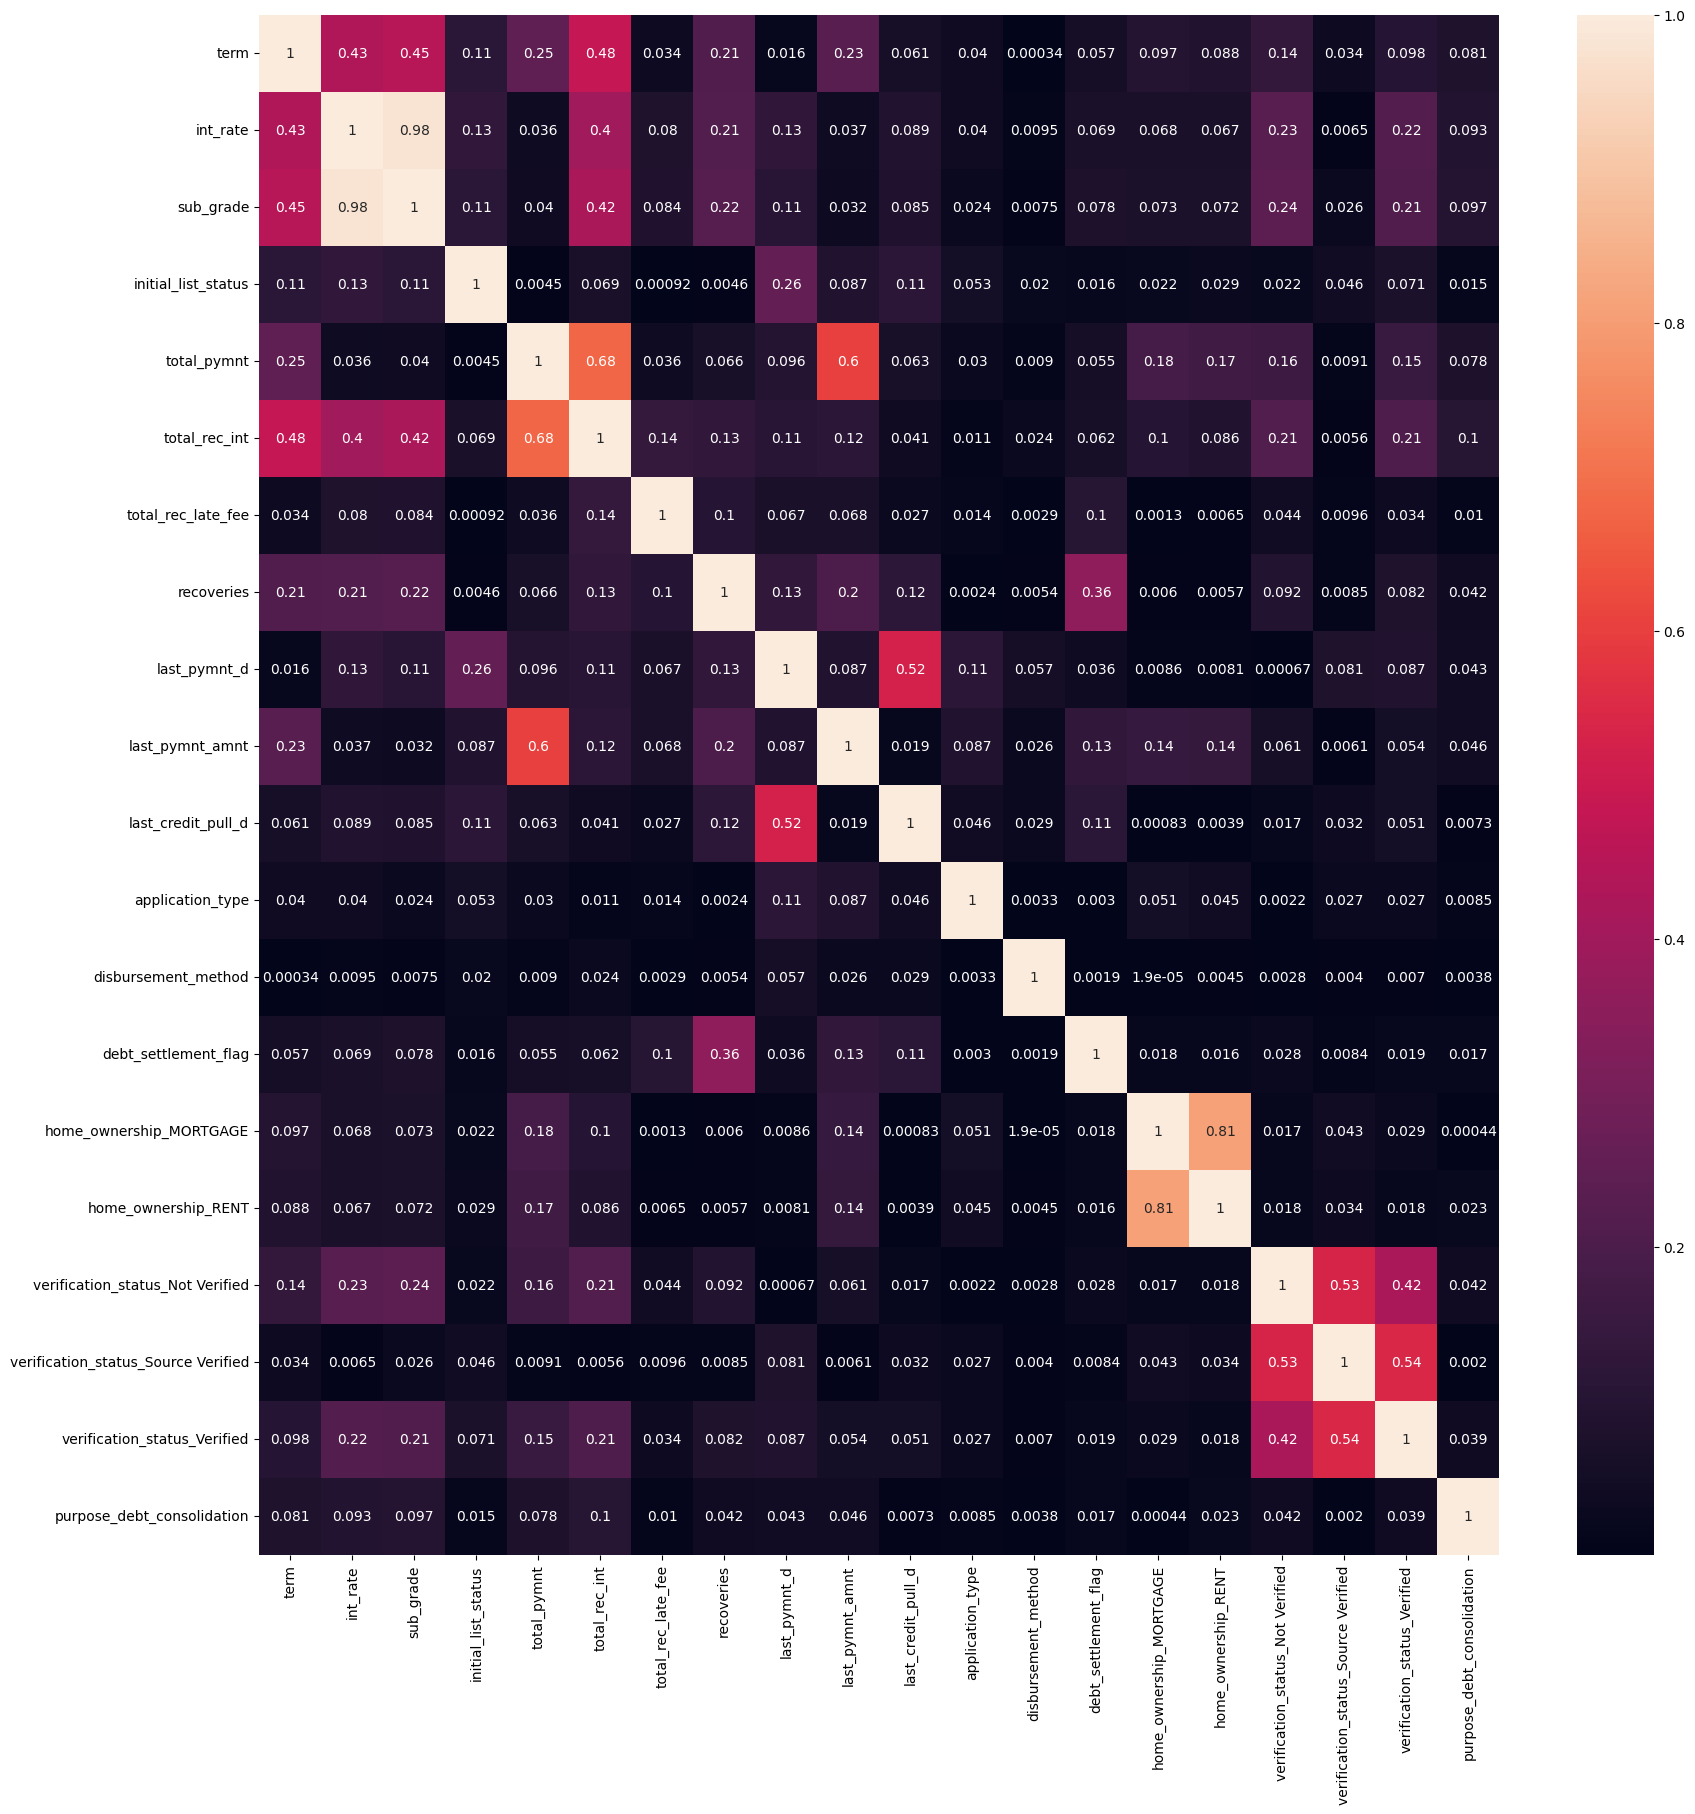

In [97]:
correlation_matrix = X_train.corr().abs()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Dropping correlated features

'int_rate' and 'sub_grade' are highly correlated. <br>
So we can drop 'sub_grade'.

In [98]:
X_train.drop(['sub_grade'], axis=1, inplace=True)
X_valid.drop(['sub_grade'], axis=1, inplace=True)
test_data.drop(['sub_grade'], axis=1, inplace=True)

## Training the Model

### Creating the model

In [99]:
from xgboost import XGBClassifier as xgb

model = xgb(objective='binary:logistic', n_estimators=1000, seed=123)

### Tuning the hyperparameters

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model = xgb(objective='binary:logistic', n_estimators=1000, seed=123)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 500, 1000]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, Y_train)

# Summarizing the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.009718 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
-0.073526 (0.001380) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
-0.024422 (0.000569) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
-0.016027 (0.000585) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
-0.054815 (0.000820) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
-0.016168 (0.000592) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
-0.011400 (0.000543) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}
-0.040734 (0.001084) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
-0.012256 (0.000551) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
-0.009718 (0.000586) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
-0.284598 (0.001115) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
-0.117284 (0.001246) with: {'learning_rate'

### Cross validation

In [101]:
from sklearn.model_selection import cross_val_score

model.fit(X_train, Y_train)

scores = cross_val_score(model, X_train, Y_train, cv=10)

# Printing the mean of the cross validation scores with 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


### Testing the accuracy of the model

In [102]:
from sklearn.metrics import accuracy_score

Y_valid_pred = model.predict(X_valid)

predictions = [round(value) for value in Y_valid_pred]
accuracy_valid = accuracy_score(Y_valid, predictions)
print("Accuracy is", accuracy_valid*100, "%")

Accuracy is 99.79458931071834 %


## SHAP analysis

### Importing the libraries

In [104]:
import shap

### Creating the explainer and calculating SHAP values

In [105]:
explainer = shap.TreeExplainer(model)
shaps = explainer.shap_values(X_valid)

### Drawing the graphs

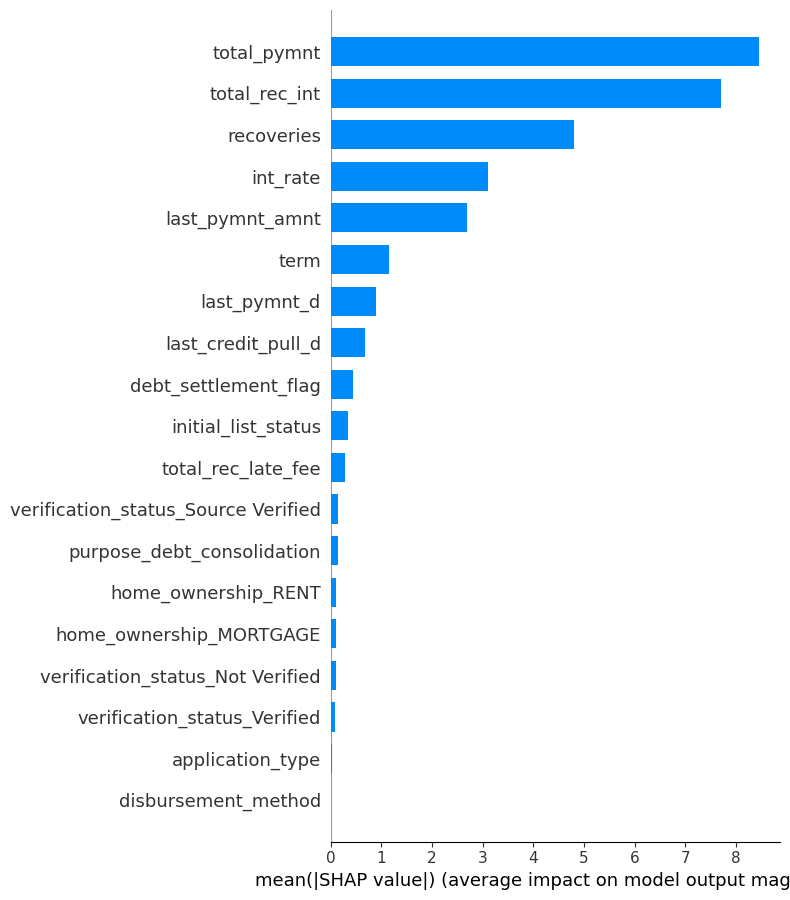

In [106]:
shap.summary_plot(shaps, X_valid, plot_type="bar")

## Making predictions using the model

In [ ]:
Y_test_pred = model.predict(test_data)

final_result = pd.DataFrame(test_data)
final_result.insert(0, 'loan_status', Y_test_pred)

final_result.to_csv('210314E.csv', index=False)